드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


라이브러리 불러오기

In [ ]:
# 1.데이터 불러오는 라이브러리
import os
import glob
import random
import shutil

# 3. csv 파일로 변경할 때 필요
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

# 파일 변경을 위한 
import shutil

## 완료된 모델 사용시 실행해야 하는 코드 모음

In [ ]:
# %cd /content/gdrive/MyDrive/models/research
# !protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# %cd /content/gdrive/MyDrive/models/research
# !cp /content/gdrive/MyDrive/models/research/object_detection/packages/tf2/setup.py .

In [ ]:
# %cd /content/gdrive/MyDrive/models/research
# !cp /content/gdrive/MyDrive/models/research/object_detection/packages/tf2/setup.py .
# !python -m pip install  .

# 모델 새로 구축시시

## 1. 데이터 분리(훈련, 테스트)

라벨링 개수와 이미지 개수 일치 시키기

In [ ]:
# # 이미지 파일 모두 리스트에 저장
# %cd /content/gdrive/MyDrive/data/com_data/images_c
# images = glob.glob("*.jpg")

# # 라벨링 파일 모두 리스트에 저장
# %cd /content/gdrive/MyDrive/data/com_data/labels_xml
# labels = glob.glob("*.xml")

# # 이미지, 라벨링 개수 확인
# print(len(images))
# # print(images[:5])
# print(len(labels))

# # 삭제해야 하는 이미지 파일 출력하기
# for img in images:
#   if img[:-4]+".xml" not in labels:
#     print("label 없는 파일 : ",img)

# for label in labels:
#   if label[:-4]+".jpg" not in images:
#     print("img 없는 파일 : ",label)

# %cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive/data/com_data/images_c
/content/gdrive/MyDrive/data/com_data/labels_xml
1621
1622
img 없는 파일 :  447632_DTD1T_5729_004_067_0029_Light5 (1).xml
/content/gdrive/MyDrive


%cd /content/gdrive/MyDrive/ 위치로 이동하기

raw_data파일에 있는 images와 labels 훈련데이터, 테스트 데이터 나우기

In [ ]:
# raw_data_path = "/content/gdrive/MyDrive/data/com_data/images_c"
# train_data_path = "/content/gdrive/MyDrive/data/split_data/train"
# test_data_path = "/content/gdrive/MyDrive/data/split_data/test"

# # split_data 폴더가 존재하지 않으면 생성
# if not os.path.exists("/content/gdrive/MyDrive/data/split_data/"):
#   os.mkdir("/content/gdrive/MyDrive/data/split_data/")
  
# try:
#   shutil.rmtree(train_data_path)
#   shutil.rmtree(test_data_path)
# except:
#   pass

# os.mkdir(train_data_path)
# os.mkdir(test_data_path)

# # 이미지 파일들 total_files에 저장
# total_files = glob.glob(raw_data_path + "/*.jpg")
# print("샘플 이미지  = ", total_files)
# print("이미지 총 개수 = ", len(total_files))

# # 이미지 총 개수를 0~N까지 리스트로 만들어서 indices에 저장
# indices = list(range(len(total_files)))
# # train_indices : 임의의 숫자 k개를 뽑아서 리스트로 만들어줌(7:3)
# train_indices = random.sample(indices, k = int(len(total_files)*0.7))
# print("훈련데이터 개수 = ", len(train_indices))

# # 아래 코드는 주석처리함

# # 총 이미지 개수만큼 for문을 돌릴거임
# # raw data에서 훈련데이터와 테스트데이터를 나눌 예정
# for i in indices:
#     # 숫자가 train_indices에 있으면 train에 해당되는 것이므로 훈련데이터 폴더에 복사하기
#     if (i in train_indices):
#         # Copy to train
#         shutil.copy(total_files[i], train_data_path + total_files[i].replace(raw_data_path,""))
#         shutil.copy(total_files[i].replace("images_c","labels_xml").replace(".jpg",".xml"), 
#                     train_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))
#     else:
#         # Copy to test
#         shutil.copy(total_files[i], test_data_path + total_files[i].replace(raw_data_path, ""))
#         shutil.copy(total_files[i].replace("images_c", "labels_xml").replace(".jpg", ".xml"),
#                     test_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))


샘플 이미지  =  ['/content/gdrive/MyDrive/data/com_data/images_c/400249_UN50N_2176_001_076_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/658574_18YSG_1060_002_100_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/675797_AAAW4_4950_001_070_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/446744_DTDIT_1000_001_055_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/636706_E12CK_9361_002_080_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/645454_1DB0G_1000_002_065_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/675797_AAAW4_4950_002_070_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/636709_E0UFG_8840_007_080_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/443496_DTDIT_1000_003_100_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/550618_96I3B_8745_002_061_0000_Light5.jpg', '/content/gdrive/MyDrive/data/com_data/images_c/675797_AAAW4_4950_00

In [ ]:
# 잘 나눠졌는지 확인하기
%cd /content/gdrive/MyDrive/data/split_data/train
train_ = glob.glob("*")
print(len(train_))
%cd /content/gdrive/MyDrive/data/split_data/test
test_ = glob.glob("*") 
print(len(test_))
print(len(images)*2, len(test_)+len(train_))

/content/gdrive/MyDrive/data/split_data/train
2268
/content/gdrive/MyDrive/data/split_data/test
974
3242 3242


label 내용을 csv파일로 저장함

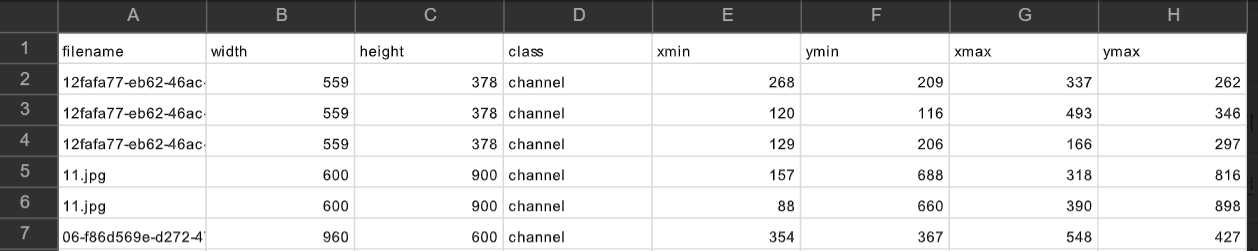

In [ ]:
# 3.Convert XML label to  CSV

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

for directory in ['train','test']:
        image_path = os.path.join('/content/gdrive/MyDrive/data/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/gdrive/MyDrive/data/split_data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')
     

Successfully converted xml to csv.
Successfully converted xml to csv.


## 2.Pre-Trained 모델 다운하기기

In [ ]:
# folder_paths = ['/content/gdrive/MyDrive/models', '/content/gdrive/MyDrive/pretrained', '/content/gdrive/MyDrive/output_model']
# for folder in folder_paths:
#   if os.path.isdir(folder):
#       print(folder)
#       # os.rmdir(folder)

pre-trained 모델 다운로드(클론)

In [ ]:
%cd /content/gdrive/MyDrive
!git clone https://github.com/tensorflow/models.git

/content/gdrive/MyDrive
fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
# 5. Compile the protos -  
# Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.
%cd /content/gdrive/MyDrive/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/models/research


## 3.API설정

API 설정

In [ ]:
%cd /content/gdrive/MyDrive/models/research
!cp /content/gdrive/MyDrive/models/research/object_detection/packages/tf2/setup.py .

/content/gdrive/MyDrive/models/research


In [ ]:
!python -m pip install  .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/gdrive/MyDrive/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 14.5 MB 8.0 MB/s 
     |████████████████████████████████| 2.3 MB 88.6 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 116 kB 100.0 MB/s 
     |████████████████████████████████| 238 kB 97.9 MB/s 
     |████████████████████████████████| 1.3 MB 92.0 MB/s 
     |████████████████████████████████| 5.8 MB 94.9 MB/s 
     |████████████████████████████████| 43 kB 2.5

Test API

In [ ]:
!python /content/gdrive/MyDrive/models/research/object_detection/builders/model_builder_tf2_test.py

2023-01-02 12:28:51.817235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 12:28:51.957574: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 12:28:52.779564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-02 12:28:52.779729: W tensorflow/compiler/xla/stream_executor

## 4. Lable_Map, train 및 test.record 생성성

CSV에서 TFRecordfh. and MiAI_SSD_TF2 클론

In [ ]:
%cd /content/gdrive/MyDrive/models/research
!git clone https://github.com/thangnch/MiAI_SSD_TF2 #이미 생성되었음
!cp MiAI_SSD_TF2/generate_tfrecord.py .
!cp MiAI_SSD_TF2/label_map.txt /content/gdrive/MyDrive/data

/content/gdrive/MyDrive/models/research
fatal: destination path 'MiAI_SSD_TF2' already exists and is not an empty directory.


##### 파일 내용 변경(Customized)

In [ ]:
try:
  # label.txt 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/label_map.txt', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/label_map.txt')
  # data
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/label_map.txt', '/content/gdrive/MyDrive/data/label_map.txt')


  # generate.py 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/generate_tfrecord.py', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/generate_tfrecord.py')
  # research
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/generate_tfrecord.py', '/content/gdrive/MyDrive/models/research/generate_tfrecord.py')


  # pipeconfig 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/pipeline.config', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/pipeline.config')
  # pretrained
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/pipeline.config', '/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config')
except Exception as e:
    print(e)

##### record 생성성

In [ ]:
if not os.path.exists("/content/gdrive/MyDrive/data/tfrecord_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/train --csv_input=/content/gdrive/MyDrive/data/split_data/train_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/train.record 
!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/test --csv_input=/content/gdrive/MyDrive/data/split_data/test_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/test.record 


2023-01-02 12:29:37.491995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 12:29:37.630085: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 12:29:38.395411: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-02 12:29:38.395514: W tensorflow/compiler/xla/stream_executor

## 5.Download pretrain and config

In [ ]:
# 이미 있으므로 생략하겠음(pipeliine.config)
if not os.path.exists("/content/gdrive/MyDrive/pretrained"):
  os.mkdir("/content/gdrive/MyDrive/pretrained")

%cd /content/gdrive/MyDrive/pretrained
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Config pipeline.config, label_map.txt if needed

/content/gdrive/MyDrive/pretrained
--2023-01-02 12:29:56--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.70.128, 2607:f8b0:4001:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.70.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.2’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  81.0MB/s    in 0.2s    

2023-01-02 12:29:56 (81.0 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.2’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mob

##### 파일 내용 변경(Customized)

In [ ]:
try:
  # label.txt 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/label_map.txt', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/label_map.txt')
  # data
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/label_map.txt', '/content/gdrive/MyDrive/data/label_map.txt')


  # generate.py 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/generate_tfrecord.py', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/generate_tfrecord.py')
  # research
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/generate_tfrecord.py', '/content/gdrive/MyDrive/models/research/generate_tfrecord.py')


  # pipeconfig 파일 변경
  # MiAI_SSD_TF2
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/pipeline.config', '/content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/pipeline.config')
  # pretrained
  shutil.copyfile('/content/gdrive/MyDrive/files_changed/pipeline.config', '/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config')
except Exception as e:
    print(e)

## 6.필요한 라이브러리 다운로드드

##### label파일들 object-detection.txt를 data 폴더에 업로드

In [ ]:
%cd /content/gdrive/MyDrive/models
!pip install -r /content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/setup.txt # 이미 완료
!pip install --upgrade opencv-python # 이미 완료

/content/gdrive/MyDrive/models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 83.6 MB/s 
     |████████████████████████████████| 352 kB 98.0 MB/s 
     |████████████████████████████████| 2.4 MB 83.7 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.28.0
    Uninstalling tensorflow-io-gcs-filesystem-0.28.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.28.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61.8 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


## 7.Train

Train and Test

In [ ]:
# # Train
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/model_main_tf2.py .

/content/gdrive/MyDrive/models/research


In [ ]:
#train 
%cd /content/gdrive/MyDrive/models/research
!python model_main_tf2.py \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/content/gdrive/MyDrive/output_model --alsologtostderr --num_train_steps=2000

/content/gdrive/MyDrive/models/research
2023-01-02 13:01:46.100669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 13:01:46.239624: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 13:01:47.091457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-02 13:01:47.091570: W

## 8.Export Model

In [ ]:
# # Export model   :    /content/gdrive/MyDrive/export_model/saved_model
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/exporter_main_v2.py .

# Export model2   :    /content/gdrive/MyDrive/export_model/saved_model
!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/output_model \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/export_model_train1000

/content/gdrive/MyDrive/models/research
2022-12-21 16:32:52.327442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 16:32:52.468807: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-21 16:32:53.430009: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-21 16:32:53.430122: W

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%cd /content/gdrive/MyDrive/models/research
#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/export_model_train1000/saved_model")
     

/content/gdrive/MyDrive/models/research


OSError: ignored

#### 줄이기기

In [ ]:
# Các hàm inference

import cv2
def run_inference_for_single_image(model, image):
  
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
     

#### 실행

 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci2.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci1.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci3.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci4.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci5.jpg'  
 image_path = '/content/gdrive/MyDri/ve/data/split_data/new/gucci6.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci7.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci8.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci9.jpg'  
image_path = '/content/gdrive/MyDrive/data/split_data/test/400249_0K7JN_9680_001_076_0000_Light5.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/test/가방사진 (717).jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci9.jpg'  
 image_path = '/content/gdrive/MyDrive/data/split_data/new/channel2.jpg  

In [ ]:
%cd /content/gdrive/MyDrive/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/data/label_map.txt", use_display_name=True)

# image_path = '/content/gdrive/MyDrive/data/split_data/test/가방사진 (321).jpg'
# image_path = '/content/gdrive/MyDrive/data/split_data/test/400249_0K7JN_9680_001_076_0000_Light5.jpg'
image_path = '/content/gdrive/MyDrive/data/split_data/new/channel_14.jpg'
# image_path = '/content/gdrive/MyDrive/data/split_data/new/channel2.jpg'
# image_path = '/content/gdrive/MyDrive/data/split_data/new/gucci7.jpg'

image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=1, fy=1)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index = category_index,
    # instance_masks=output_dict.get('detection_masks_reframed', None),
    instance_masks=output_dict.get('detection_masks', None),
    use_normalized_coordinates=True,
    line_thickness=5,
    # skip_boxes = True,
    # skip_scores = True,
    # skip_labels=True,
    # skip_track_ids=True
    )
print("Done draw on image ")
display(Image.fromarray(image_np))

In [ ]:
# /content/gdrive/MyDrive/data/com_data/images_c

In [ ]:
# from PIL import Image
# import glob
# import numpy as mp

# images = glob.glob("/content/gdrive/MyDrive/data/com_data/images_c/*.jpg")
# h = []; w = []

# for num in range(len(images)):
#   image1 = Image.open(images[num])
#   imag1_size = image1.size
#   w.append(imag1_size[0])
#   h.append(imag1_size[1])

In [ ]:
# print("최대값 : 높이 -", max(h), "가로 -", max(w))
# print("평균값 : 높이 -", int(mp.mean(h)), "가로 -", int(mp.mean(w)))
# print("중간값 : 높이 -", int(mp.median(h)), "가로 -", int(mp.median(w)))

In [ ]:
# print("이미지 총 개수 :",len(images))

# print("중간값보다 큰 이미지 개수 :", len([h_ for h_ in h if h_>int(mp.median(w))]))
# print("중간값보다 큰 이미지 개수 :", len([w_ for w_ in w if w_>int(mp.median(h))]))

# print("평균값보다 큰 이미지 개수 :", len([h_ for h_ in h if h_>int(mp.mean(h))]))
# print("평균값보다 큰 이미지 개수 :", len([w_ for w_ in w if w_>int(mp.mean(w))]))


In [ ]:
# h_2 = [h_ for h_ in h if h_>int(mp.mean(h))]
# w_2 = [w_ for w_ in h if w_>int(mp.mean(w))]

# print("===== 평균 기준으로 재측정 =======")
# print("최대값 : 높이 -", max(h_2), "가로 -", max(w_2))
# print("평균값 : 높이 -", int(mp.mean(h_2)), "가로 -", int(mp.mean(w_2)))
# print("중간값 : 높이 -", int(mp.median(h_2)), "가로 -", int(mp.median(w_2)))

# print(" ")
# print("이미지 총 개수 :",len(images))

# print("중간값보다 큰 이미지 개수 :", len([h_ for h_ in h_2 if h_>int(mp.median(w_2))]))
# print("중간값보다 큰 이미지 개수 :", len([w_ for w_ in w_2 if w_>int(mp.median(h_2))]))

# print("평균값보다 큰 이미지 개수 :", len([h_ for h_ in h_2 if h_>int(mp.mean(h_2))]))
# print("평균값보다 큰 이미지 개수 :", len([w_ for w_ in w_2 if w_>int(mp.mean(w_2))]))